In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

In [3]:
sys.path.append("C:/Users/User/Desktop/hopfield-izhikevich/hopfield/")
from hopfield import Hopfield
sys.path.pop();

In [4]:
dataset_iter = tfds.as_numpy(tfds.load('mnist', split='train', shuffle_files=True, as_supervised=True))
dataset = np.fromiter(dataset_iter, dtype=tuple)

In [5]:
digits = [[] for i in range(10)]
index = 0
for d in dataset:
    digits[d[1]].append(index)
    index += 1

In [6]:
memory_images = []
scale = 0.6
threshold = 100
shape = ()
for digit in range(10):
    index = random.choice(digits[ digit ])
    image = tf.image.central_crop(dataset[index][0], scale)
    image = tf.where(image>threshold, 1, 0)
    memory_images.append(image.numpy().flatten())

    
shape = tuple(image.shape)[:2]
memory_images = np.array(memory_images, dtype=np.float32)*2-1


In [7]:
index = random.choice(digits[ 6 ])
image = tf.image.central_crop(dataset[index][0], scale)
image = tf.where(image>threshold, 1, 0)
image = image.numpy().flatten()
image = np.array(image, np.float32)*2-1

In [8]:
model = Hopfield()
model.train(memory_images)

In [9]:
result = model.run(image, q=0.4)

In [10]:
def classify(image, dataset, score)-> int:
    max_i = 0
    for i in range(len(dataset)):
        sample = dataset[i]
        if score(image, sample) > score(image, dataset[max_i]):
            max_i = i
    return max_i
    

In [11]:
def dice_score(prediction, data) -> float:
    tp, tn, fp, fn = 0, 0, 0, 0
    for p, d in zip(prediction.flat, data.flat):
        if d>0 and p>0:
            tp += 1
        # if d<0 and p<0:
        #     tn += 1
        if d>0 and p<0:
            fn += 1
        if d<0 and p>0:
            fp += 1
  
    return 2*tp/(2*tp + fp + fn)

In [12]:
def iou_score(prediction, data) -> float:
    tp, tn, fp, fn = 0, 0, 0, 0
    for p, d in zip(prediction.flat, data.flat):
        if d>0 and p>0:
            tp += 1
        # if d<0 and p<0:
        #     tn += 1
        if d>0 and p<0:
            fn += 1
        if d<0 and p>0:
            fp += 1
  
    return tp/(tp + fp + fn)

In [13]:
predicted_label = classify(result['output'], memory_images, dice_score)
predicted_label

5

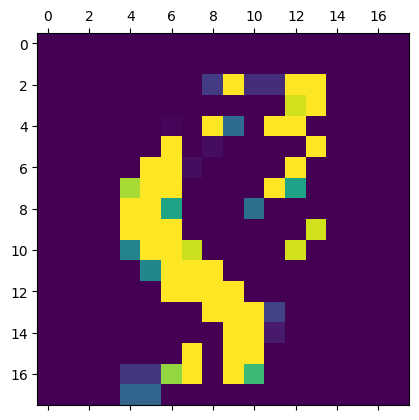

In [14]:
plt.matshow(np.resize(result['output'], shape))

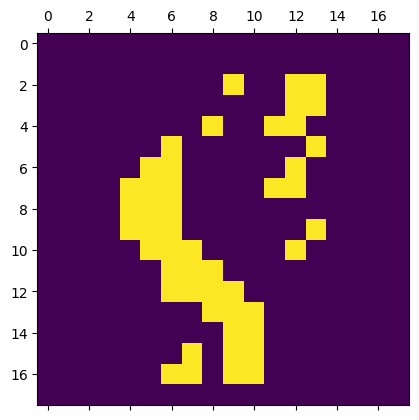

In [17]:
plt.matshow(np.resize(tf.where(result['output']>0, 1, 0), shape))